In [1]:
import xarray as xr
import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd

from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
shp = gpd.read_file('O:\\Man\\Public\\sharing-4270-CERM\\VLYMI\\CLIMEX\\gadm36_DNK_0.shp')
shp = shp.to_crs("epsg:25832")
shp = shp.to_crs("epsg:4326")

In [3]:
var = xr.open_dataset("O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\Era5-Land\\Hourly_Data\\Precipitation\\era5_land_1950_2024_tp_daily_update_DK.nc")

# Get lat/lon
lon = var["lon"]
lat = var["lat"]

var = var.rio.write_crs("epsg:4326")

In [4]:
var = var.sel(time= (
        var["time"].dt.year >= 1981) &  # Select years >= 1981
        (var["time"].dt.year <= 2010))

In [5]:
var = var.tp.resample(time="YE").sum()
var = var.mean(dim = "time")
var = var*1000
var = var.rio.clip(shp.geometry, shp.crs)

C:\Users\mnew\AppData\Local\Temp\ipykernel_15588\2258304179.py:14: UserWarning: The following kwargs were not used by contour: 'shading'
  plt.contourf(var.lon, var.lat, var.squeeze(), cmap="Blues", shading="auto")


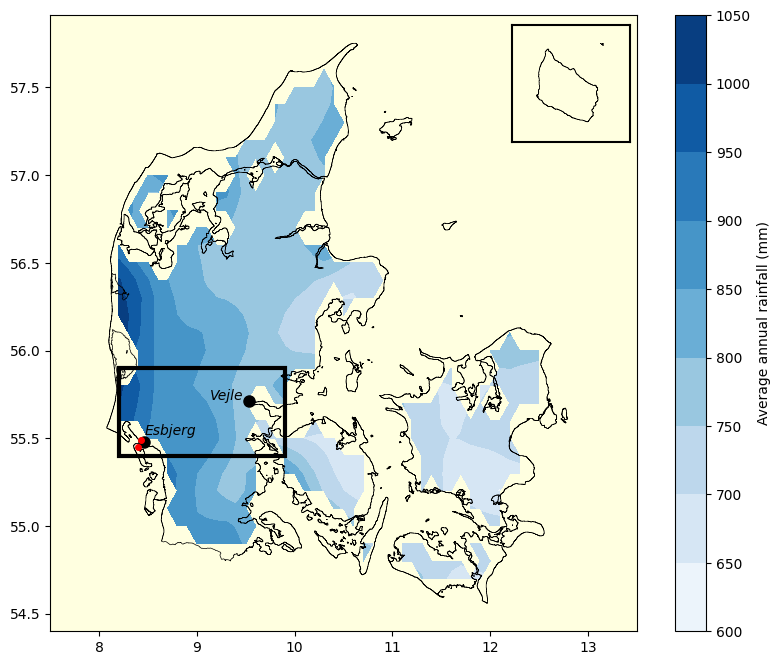

In [6]:
#Study domain
lon_min, lat_min = 8.2, 55.4
lon_max, lat_max = 9.9, 55.9

#Smaller domain size
#lat_min, lat_max = 55.38, 55.75
#lon_min, lon_max = 8.15, 9.13

fig, ax = plt.subplots(figsize=(10, 8))

# Plot NetCDF data 
var = var.where(var != 0, drop=True)
plt.contourf(var.lon, var.lat, var.squeeze(), cmap="Blues", shading="auto")

# Overlay Shapefile
shp.boundary.plot(ax=ax, color="black", linewidth=0.5)

ax.add_patch(Rectangle(
    (lon_min, lat_min),           # Bottom-left corner
    lon_max - lon_min,            # Width
    lat_max - lat_min,            # Height
    linewidth=3,
    edgecolor='black',
    facecolor='none'
))

# Add point to the plot
ax.plot(8.4594, 55.4765, marker='o', color='black', markersize=8, label='Esbjerg') #Esbjerg city
ax.text(8.4594, 55.5, 'Esbjerg', ha ='left', va = 'bottom', fontsize = 10, style = 'italic')
ax.plot(9.5364, 55.7113, marker='o', color='black', markersize=8, label='Esbjerg') #Vejle city
ax.text(9.48, 55.7, 'Vejle', ha ='right', va = 'bottom', fontsize = 10, style = 'italic')

ax.plot(8.4290176, 55.4880638, marker='o', color='red', markersize=4, label='Station') #Esbjerg station
ax.plot(8.4003, 55.4483, marker='o', color='red', markersize=4, label='Station') #Nordby station

#Create inset axes (small box inside main axes)
axins = inset_axes(ax, width="20%", height="20%", loc="upper right")
shp.boundary.plot(ax=axins, color="black", linewidth=0.5)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim(14.5, 15.4)  # dummy limits
axins.set_ylim(54.9, 55.4)
axins.set_facecolor("lightyellow")

for spine in axins.spines.values():
    spine.set_linewidth(1.5) 


#ax.set_xlabel("Longitude", fontsize=10)
#ax.set_ylabel("Latitude", fontsize=10)

ax.set_xlim(7.5, 13.5)
ax.set_facecolor("lightyellow")

cbar = plt.colorbar()
cbar.set_label("Average annual rainfall (mm)")

plt.show()